### Pandas and GPX

In [ ]:
%config IPCompleter.greedy=True

In [ ]:
import gpxpy
import matplotlib.pyplot as plt
import datetime
from geopy import distance
from math import sqrt, floor
import numpy as np
import pandas as pd

In [20]:
# this one works 
import geopandas as gpd
import fiona; fiona.supported_drivers
from lxml import objectify
def gpxdata(filename):
    gpx_file = gpd.read_file(filename)
    return gpx_file

In [26]:
mydf = gpxdata("ColtCreekcache.gpx")

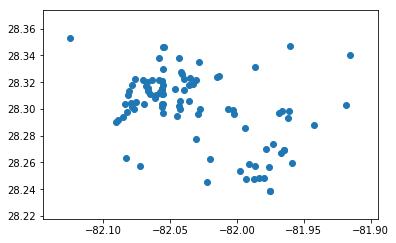

In [27]:
mydf.plot()

In [ ]:
import geopandas as gpd
import lxml 
from lxml import objectify
def gpxdata(filename):
    gpx_file = objectify.parse(filename)
    root = gpx_file.getroot()
    ch = root.getchildren()
    # return ch
    # chnum = len(root.getchildren())
    ch = [child.tag for child in root.getchildren()]
    return ch

In [ ]:
mydf = gpxdata('ColtCreekcache.gpx')

In [ ]:
mydf

In [ ]:
# this one working somewhat
import pandas as pd
import lxml 
from lxml import objectify
def gpxdata(filename):
    gpx_file = objectify.parse(filename)
    root = gpx_file.getroot()
    data=[]
    for i in range(len(root.getchildren())):
        data.append([child.text for child in root.getchildren()[i].getchildren()])
    
    df = pd.DataFrame(data)
    return df

In [ ]:
mydf = gpxdata('ColtCreekcache.gpx')

In [ ]:
mydf

In [ ]:
# gets outer data but not groundspeak tree
# inner attributes not supported by gpxpy
# https://github.com/tkrajina/gpxpy/issues/73
import gpxpy
import pandas as pd
def gpxdata(filename):
    gpx_file = open(filename , 'r')
    gpx = gpxpy.parse(gpx_file)
    df = pd.DataFrame(columns=['gname', 'lon', 'lat', 'desc', 'time', 'link', 'wtype' ])
    for point in gpx.waypoints:
        df = df.append({'gname':point.name,'lon': point.longitude, 'lat' : point.latitude, 'desc': point.description, 'time' : point.time, 'link': point.link, 'wtype': point.type}, ignore_index=True)
        
    return df    
    
    

In [ ]:
mydf = gpxdata('ColtCreekcache.gpx')

In [ ]:
mydf

In [ ]:
# works but dictionaries inside dictionaries
import xmltodict
import pandas as pd
import sqlite3
def gpxdata(filename):
    with open(filename) as fd:
        gpxfile = xmltodict.parse(fd.read())
        df = pd.DataFrame.from_dict(gpxfile)
    return df

In [ ]:
mydf = gpxdata('ColtCreekcache.gpx')

In [ ]:
mydf

In [ ]:
import xmltodict
import pandas as pd
def gpxdata(filename):
    with open(filename) as fd:
        gpx = xmltodict.parse(fd.read())
        #print(gpx)
        df = pd.DataFrame(columns=['gname', 'lon', 'lat'])
        for point in gpx['gpx']['wpt'] :
            # df.append({'gname': gpx['gpx']['wpt']['name'], 'lon': gpx ['gpx']['wpt']['@lon'], 'lat' : gpx['gpx']['wpt']['@lat']}, ignore_index=True)
            df.append({'gname': ['gpx']['wpt']['name'], 'lon': ['gpx']['wpt']['@lon'], 'lat' : ['gpx']['wpt']['@lat']}, ignore_index=True)
    #print(gpx)
    return df

In [ ]:
mydf = gpxdata('ColtCreekcache.gpx')

In [ ]:
mydf

In [ ]:
import xmltodict
import pandas as pd
def gpxdata(filename):
    with open(filename) as fd:
        gpx = xmltodict.parse(fd.read())
        df = pd.DataFrame(columns=['A','gname', 'lon', 'lat'])
        for p in gpx['gpx']['wpt'] :
        
            df.append({'A' : 1,'gname': gpx["gpx"]["wpt"]["name"][p], 'lon': gpx ["gpx"]["wpt"]['@lon'][p], 'lat' : gpx["gpx"]["wpt"]['@lat'][p]}, ignore_index=True)
        
    return df

In [ ]:
import xmltodict
import pandas as pd
def gpxdata(filename):
    with open(filename) as fd:
        gpxf = xmltodict.parse(fd.read(), process_namespaces=True)
        print(gpxf.gpx.wpt)
        df = pd.DataFrame(columns=['gname', 'lon', 'lat'])
        for point in gpx['gpx']['wpt'] :
            df.append({'gname': gpx['gpx']['wpt']['name'], 'lon': gpx ['gpx']['wpt']['@lon'], 'lat' : gpx['gpx']['wpt']['@lat']}, ignore_index=True)
            # df.append({'gname': gpx['gpx']['2']['3'], 'lon': gpx ['gpx']['2']['@lon'], 'lat' : gpx['gpx']['2']['@lat']}, ignore_index=True)
        
    return df

In [ ]:
mydf = gpxdata('ColtCreekcache.gpx')

In [ ]:
import pandas as pd
import xmltodict
def gpxdata(filename):
    with open(filename) as fd:
        gpxfile = xmltodict.parse(fd.read())
    print(gpxfile)

In [ ]:
import sqlite3
import pandas as pd
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 70)

def gpxdata(filename,table) :
# Create a SQL connection to our SQLite database
    con = sqlite3.connect(filename)
    df = pd.read_sql_query("SELECT * from " + table, con)
    con.close()
    return df


In [ ]:
mydf = gpxdata('sqlite.db3', 'Caches')

In [ ]:
dfo = pd.DataFrame.from_dict(mydf.iat[14,0])


In [ ]:
mydf

In [ ]:
from xml.dom import minidom
import pandas as pd
def gpxdata(filename):
    gpx_file = minidom.parse(filename)
    name = gpx_file.getElementsByTagName("wpt")[0]
    
    print(name)

In [ ]:
from xml.etree import ElementTree
tree = ElementTree.parse("ColtCreekcache.gpx")
for wpt in gpx :
    item = tree.getroot()[9][7][9].text
    print(item)